<a href="https://colab.research.google.com/github/KONSHU68/SRIRAM/blob/main/AI_Route_Navigation_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import random

class QLearningAgent:
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.q_table = np.zeros((n_states, n_actions))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_actions = n_actions

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return random.randint(0, self.n_actions - 1)
        return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state):
        predict = self.q_table[state][action]
        target = reward + self.gamma * np.max(self.q_table[next_state])
        self.q_table[state][action] += self.alpha * (target - predict)


In [14]:
class GridEnvironment:
    def __init__(self, size, start, goal, obstacles=[]):
        self.size = size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.reset()

    def reset(self):
        self.position = self.start
        return self._state_to_index(self.position)

    def step(self, action):
        x, y = self.position
        if action == 0: x -= 1  # up
        elif action == 1: x += 1  # down
        elif action == 2: y -= 1  # left
        elif action == 3: y += 1  # right

        x = max(0, min(self.size[0] - 1, x))
        y = max(0, min(self.size[1] - 1, y))
        next_position = (x, y)

        if next_position in self.obstacles:
            next_position = self.position  # Blocked

        self.position = next_position
        done = (self.position == self.goal)
        reward = 10 if done else -1
        return self._state_to_index(self.position), reward, done

    def _state_to_index(self, pos):
        return pos[0] * self.size[1] + pos[1]


Episode 0, Total Reward: -151
Episode 100, Total Reward: 1
Episode 200, Total Reward: 1
Episode 300, Total Reward: 3
Episode 400, Total Reward: 3
Episode 500, Total Reward: 1
Episode 600, Total Reward: 3
Episode 700, Total Reward: 3
Episode 800, Total Reward: 0
Episode 900, Total Reward: 3


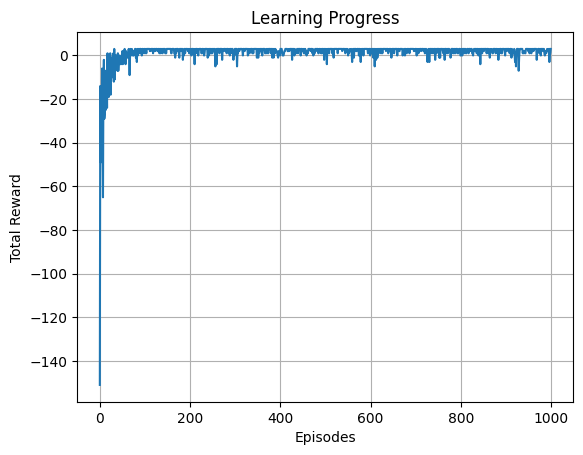

Training complete!


In [15]:
import matplotlib.pyplot as plt
import pickle

def plot_rewards(rewards):
    plt.plot(rewards)
    plt.xlabel("Episodes")
    plt.ylabel("Total Reward")
    plt.title("Learning Progress")
    plt.grid(True)
    plt.show()

def save_q_table(agent, filename="q_table.pkl"):
    with open(filename, "wb") as f:
        pickle.dump(agent.q_table, f)

def load_q_table(agent, filename="q_table.pkl"):
    with open(filename, "rb") as f:
        agent.q_table = pickle.load(f)

# Setup
grid_size = (5, 5)
start = (0, 0)
goal = (4, 4)
obstacles = [(1, 1), (2, 2), (3, 3)]

env = GridEnvironment(grid_size, start, goal, obstacles)
agent = QLearningAgent(n_states=grid_size[0]*grid_size[1], n_actions=4)

rewards = []
episodes = 1000
for ep in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = agent.act(state)
        next_state, reward, done = env.step(action)
        agent.learn(state, action, reward, next_state)
        state = next_state
        total_reward += reward
    rewards.append(total_reward)
    if ep % 100 == 0:
        print(f"Episode {ep}, Total Reward: {total_reward}")

save_q_table(agent)
plot_rewards(rewards)
print("Training complete!")


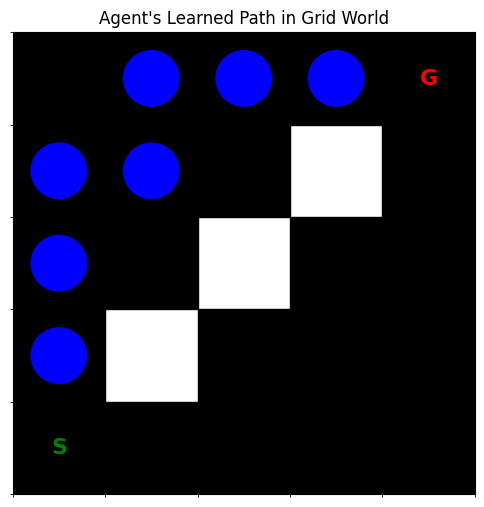

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_grid_path(agent, env, path_color='blue'):
    grid = np.zeros(env.size)
    for obs in env.obstacles:
        grid[obs] = -1  # mark obstacles

    start = env.start
    goal = env.goal

    state = env._state_to_index(start)
    pos = start
    path = [pos]
    visited = set()

    for _ in range(50):  # limit steps to avoid infinite loops
        action = np.argmax(agent.q_table[state])
        x, y = pos
        if action == 0: x -= 1
        elif action == 1: x += 1
        elif action == 2: y -= 1
        elif action == 3: y += 1
        x = max(0, min(env.size[0] - 1, x))
        y = max(0, min(env.size[1] - 1, y))
        next_pos = (x, y)

        if next_pos in env.obstacles or next_pos in visited:
            break

        path.append(next_pos)
        visited.add(next_pos)
        pos = next_pos
        state = env._state_to_index(pos)

        if pos == goal:
            break

    # Draw grid
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xticks(np.arange(env.size[1]+1) - 0.5, minor=True)
    ax.set_yticks(np.arange(env.size[0]+1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
    ax.imshow(grid, cmap='gray_r')

    ax.text(start[1], start[0], 'S', va='center', ha='center', color='green', fontsize=16, fontweight='bold')
    ax.text(goal[1], goal[0], 'G', va='center', ha='center', color='red', fontsize=16, fontweight='bold')

    for (x, y) in path:
        if (x, y) != start and (x, y) != goal:
            ax.add_patch(plt.Circle((y, x), 0.3, color=path_color))

    ax.set_title("Agent's Learned Path in Grid World")
    ax.set_xticks([])
    ax.set_yticks([])
    plt.gca().invert_yaxis()
    plt.show()
visualize_grid_path(agent, env)
